<a href="https://colab.research.google.com/github/g-roger/analise-vegetativa-bemagro/blob/main/Oficial_20ia_05_EDA_bemagro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de vegetação

Neste projeto possui dois datasets com imagens de setores de uma fazenda da região do Mato Grosso do Sul. O objetivo é baseado nas mesmas, responder as seguintes questões:

1. Baseado na análise das imagens, podemos avaliar se a lavoura está adiantada ou atrasada?
2. Existem áreas de recorrência do subdesenvolvimento? É possível detectar essas áreas?
3. Existem áreas de subdesenvolvimento exclusivos de uma determinada cultura?

Além dos datasets, foram fornecidos arquivos CSV. Eles listam algumas variáveis sobre as imagens que estão nos datasets.

Os pontos que serão estudados nesse notebook tem como base resolver as questões acima, possivelmente com o uso de ferramentas de visão computacional, machine learning e/ou deep learning.

## Imagens do dataset

As diferenças entre ambos os datasets aparentemente são as localizações. 

As imagens possuem em seu label sua data, podendo realizar uma análise temporal para entender as diferenças e apontar algum estudo que resolva alguma das questões acima.

### Formato das imagens

Ambos os datasets possuem dois diretórios, um chamado RGB e outro NDVI.

RGB é uma escala que possuí três canais(bands) de cores, cujo são: Red, Green e Blue. Comparar as imagens com histogramas nessa escala tende a ser mais efetivo para detectar recorrencia de áreas de subdesenvolvimento.

NDVI é uma imagem que foi cálculada o índice de vegetação, o mesmo é possível análisar a vegetação da localidade e entender melhor sua cultura e monitorar sua lavoura.

A fórmula e como segue:      NDVI = (Infra Vermelho – Vermelho) / (Infra Vermelho +Vermelho)

O princípio teórico é que a vegetação, quanto mais ativa, mais absorve a luz solar na região do vermelho, no processo de trabalho da clorofila nos tecidos vegetais, deixando os valores digitais baixos da imagem de satélite no canal vermelho. Da mesma forma, a estruturas celulares das folhas provocam uma forte reflexão da luz solar na região do  Infravermelho próximo (distribuição angular delas e o fator de reflectância bidirecional e outros fatores externos, explica a literatura), deixando os valores digitais altos da imagem de satélite no canal infra vermelho. (texto retirado de: http://www.engesat.com.br/softwares/global-mapper/calculo-do-indice-de-vegetacao-ndvi-no-global-mapper/#:~:text=NDVI%20%C3%A9%20a%20abrevia%C3%A7%C3%A3o%20da,imagens%20geradas%20por%20sensores%20remotos.)

## Pretenções do projeto

Foram refletidos alguns pontos para resolução das questões:

1. Analise sobre volumetria de culturas;
2. Analise sobre comportamento de variável "Nublado". Entender se a mesma pode interferir nas questões acima;
3. Analise exploratória sobre NDVI para entendimento se lavoura está adiantada ou atrasada;
4. Analise exploratória sobre RGB para entendimento se possuí áreas de subdesenvolvimento (NDVI)
5. Clusterização de grupos de imagens por pixels para saber se estão em área de subdesenvolvimento ou não;
6. Clusterização de grupo de imagens por cultura para entendimento se uma cultura está aparecendo mais em uma área de subdesenvolvimento;
7. Explorar conectar google earth com dados de chuvas/temporais da região listada e saber se tem interferências em áreas de subdesenvolvimento;


Criar novo dataset com porcetagem de produtividade de cada imagem.
Vnet



# Instalações obrigatórias

In [25]:
# requirements

!pip install rasterio
!pip install ipygee
!pip install geemap

# Importações

In [26]:
# imports do google earth (ainda não usei)
import ee
import geemap

# raster imports e básico para análise
import pandas as pd
import rasterio
from rasterio.plot import show, show_hist
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import rasterio.features
import rasterio.warp
from ipygee import*
rasterio.__version__

'1.2.10'

# Leitura de datasets

In [27]:
# paths

path = 'https://raw.githubusercontent.com/g-roger/analise-vegetativa-bemagro/main/datasets'
dataset_1 = path + '/dataset_1/'
dataset_2 = path + '/dataset_2/'
df_1 = pd.read_csv(dataset_1 + 'DATASET1.csv')
df_2 = pd.read_csv(dataset_2 + 'DATASET2.csv')

In [28]:
# pegar todos os itens do dataset

def get_rasters(df, dataset):
  raster_list = []
  for file in df['NDVI']:
    try:
      raster_list.append(dataset + file)
    except:
      print('ops, não achei', file)
      continue
  return raster_list

rasters_df1 = get_rasters(df_1, dataset_1)
rasters_df2 = get_rasters(df_2, dataset_2)

In [29]:
df_1.sort_values(by='Nublado', ascending=False)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
7,2017,1,2017-01-04,"9,52%",colheita,RGB/2017-01-04.tif,NDVI/2017-01-04.tif
16,2017,11,2017-11-15,"6,93%",soja,RGB/2017-11-15.tif,NDVI/2017-11-15.tif
29,2018,12,2018-12-25,"6,34%",colheita,RGB/2018-12-25.tif,NDVI/2018-12-25.tif
44,2020,3,2020-03-19,"6,04%",algodao,RGB/2020-03-19.tif,NDVI/2020-03-19.tif
9,2017,4,2017-04-04,"56,00%",algodao,RGB/2017-04-04.tif,NDVI/2017-04-04.tif
...,...,...,...,...,...,...,...
21,2018,4,2018-04-14,"0,00%",algodao,RGB/2018-04-14.tif,NDVI/2018-04-14.tif
22,2018,5,2018-05-14,"0,00%",algodao,RGB/2018-05-14.tif,NDVI/2018-05-14.tif
23,2018,6,2018-06-18,"0,00%",algodao,RGB/2018-06-18.tif,NDVI/2018-06-18.tif
34,2019,5,2019-05-19,"0,00%",algodao,RGB/2019-05-19.tif,NDVI/2019-05-19.tif


In [30]:
df_1.head(20)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
5,2016,11,2016-11-25,"13,24%",soja,RGB/2016-11-25.tif,NDVI/2016-11-25.tif
6,2016,12,2016-12-05,"22,73%",soja,RGB/2016-12-05.tif,NDVI/2016-12-05.tif
7,2017,1,2017-01-04,"9,52%",colheita,RGB/2017-01-04.tif,NDVI/2017-01-04.tif
8,2017,2,2017-02-23,"13,08%",algodao,RGB/2017-02-23.tif,NDVI/2017-02-23.tif
9,2017,4,2017-04-04,"56,00%",algodao,RGB/2017-04-04.tif,NDVI/2017-04-04.tif


In [31]:
df_2

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,5,2016-05-19,"0,00%",algodao,RGB/2016-05-19.tif,NDVI/2016-05-19.tif
3,2016,6,2016-06-28,"0,00%",algodao,RGB/2016-06-28.tif,NDVI/2016-06-28.tif
4,2016,7,2016-07-18,"0,00%",colheita,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
...,...,...,...,...,...,...,...
62,2021,8,2021-08-11,"0,00%",algodao,RGB/2021-08-11.tif,NDVI/2021-08-11.tif
63,2021,9,2021-09-15,"0,00%",colheita,RGB/2021-09-15.tif,NDVI/2021-09-15.tif
64,2021,10,2021-10-15,"0,00%",soja,RGB/2021-10-15.tif,NDVI/2021-10-15.tif
65,2021,11,2021-11-29,"0,00%",soja,RGB/2021-11-29.tif,NDVI/2021-11-29.tif


In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   temp ano  66 non-null     int64 
 1   temp mes  66 non-null     int64 
 2   Data      66 non-null     object
 3   Nublado   66 non-null     object
 4   Cultura   66 non-null     object
 5   RGB       66 non-null     object
 6   NDVI      66 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.7+ KB


# 1. Analise sobre volumetria de culturas

In [33]:
# contagem de imagens de cada uma das culturas:

print(df_1.Cultura.value_counts(),'\n')
print(df_2.Cultura.value_counts())

algodao     34
soja        21
colheita    11
Name: Cultura, dtype: int64 

algodao     35
soja        21
colheita    11
Name: Cultura, dtype: int64


In [34]:
df_1_culturas = df_1.groupby('Cultura').size().reset_index().sort_values(0, ascending=False)
df_2_culturas = df_2.groupby('Cultura').size().reset_index().sort_values(0, ascending=False)
df_1_culturas.head()

,Cultura,0
0,algodao,34
2,soja,21
1,colheita,11


In [35]:
df_2_culturas

,Cultura,0
0,algodao,35
2,soja,21
1,colheita,11


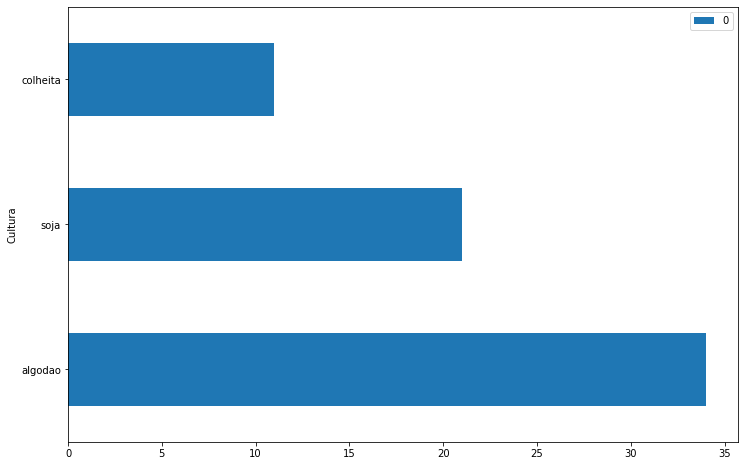

In [36]:
df_1_culturas.plot.barh(x='Cultura', y=0, figsize=(12,8))

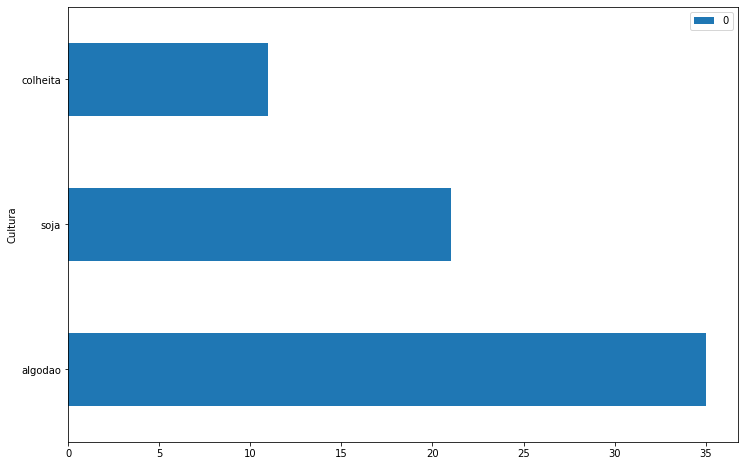

In [37]:
df_2_culturas.plot.barh(x='Cultura', y=0, figsize=(12,8))

- Ambos os datasets possuem aproximadamente a mesma quantidade de culturas;
- Levando em consideração que cada uma das imagens tem seu tempo, o tempo a quantidade de plantação de algodão é maior enquanto soja é menor. A colheita é representada 11 vezes em ambos datasets;

for # Analise exploratória sobre NDVI para entendimento se lavoura está adiantada ou atrasada

In [38]:
df_1.head(11)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
5,2016,11,2016-11-25,"13,24%",soja,RGB/2016-11-25.tif,NDVI/2016-11-25.tif
6,2016,12,2016-12-05,"22,73%",soja,RGB/2016-12-05.tif,NDVI/2016-12-05.tif
7,2017,1,2017-01-04,"9,52%",colheita,RGB/2017-01-04.tif,NDVI/2017-01-04.tif
8,2017,2,2017-02-23,"13,08%",algodao,RGB/2017-02-23.tif,NDVI/2017-02-23.tif
9,2017,4,2017-04-04,"56,00%",algodao,RGB/2017-04-04.tif,NDVI/2017-04-04.tif


In [39]:
# definindo mapa de cores de índice

mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['red','green'])

sm = plt.cm.ScalarMappable(cmap=mymap)


In [40]:
ndvi_images = []

for i in range(0, 7):
  ndvi_images.append(rasterio.open(dataset_1 + df_1['NDVI'][i]))

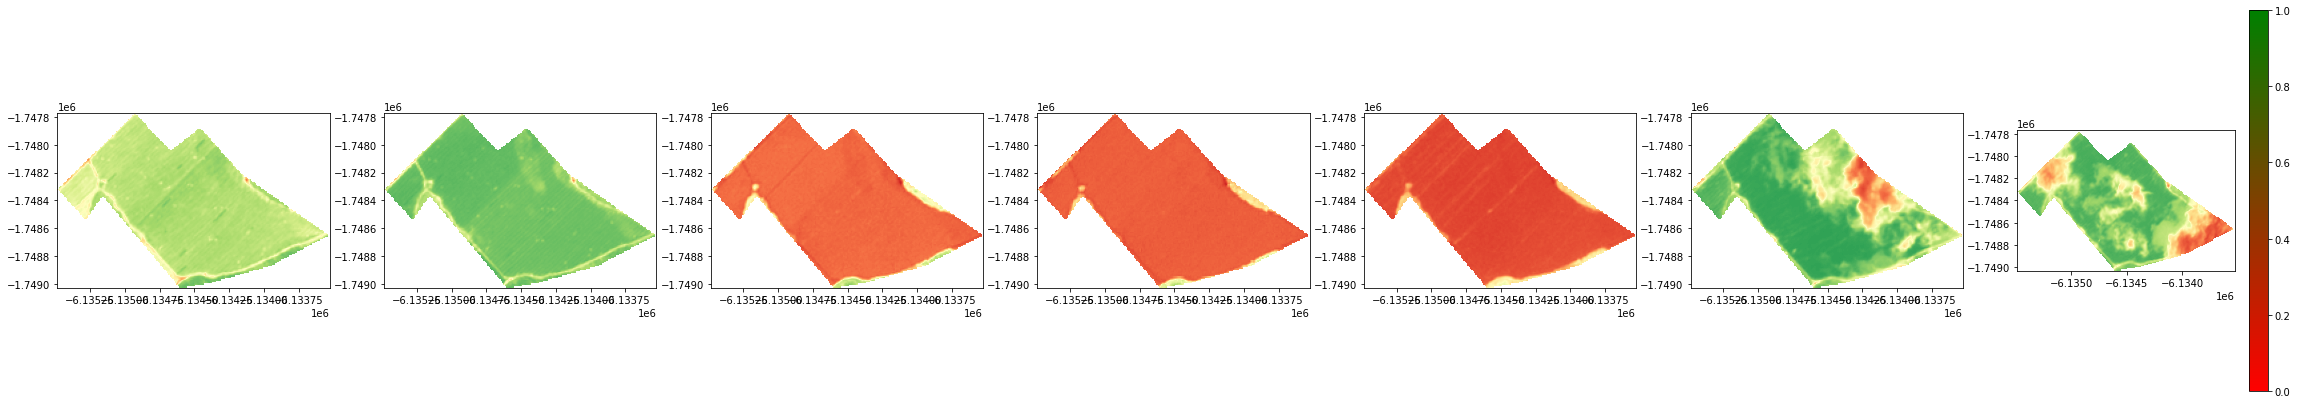

In [41]:

fig, axes = plt.subplots(1, len(ndvi_images), figsize=(40,7))
for ax, ndvi in zip(axes.flat, ndvi_images):
    show(ndvi, ax=ax, cmap='RdYlGn', vmin=0, vmax=1)

plt.colorbar(sm)
plt.show()

- Observamos que quanto mais vermelha a imagem, mais próxima da colheita.. é um ponto sobre a lavoura estar adiantada?

- será que é caracteristica da cultura "soja" demorar a imagem ficar vermelha. Ou é um indício de atraso da lavoura


In [42]:
df_1.head(7)

,temp ano,temp mes,Data,Nublado,Cultura,RGB,NDVI
0,2016,3,2016-03-30,"0,00%",algodao,RGB/2016-03-30.tif,NDVI/2016-03-30.tif
1,2016,4,2016-04-29,"0,00%",algodao,RGB/2016-04-29.tif,NDVI/2016-04-29.tif
2,2016,7,2016-07-18,"0,00%",algodao,RGB/2016-07-18.tif,NDVI/2016-07-18.tif
3,2016,8,2016-08-07,"0,00%",colheita,RGB/2016-08-07.tif,NDVI/2016-08-07.tif
4,2016,9,2016-09-16,"0,89%",soja,RGB/2016-09-16.tif,NDVI/2016-09-16.tif
5,2016,11,2016-11-25,"13,24%",soja,RGB/2016-11-25.tif,NDVI/2016-11-25.tif
6,2016,12,2016-12-05,"22,73%",soja,RGB/2016-12-05.tif,NDVI/2016-12-05.tif


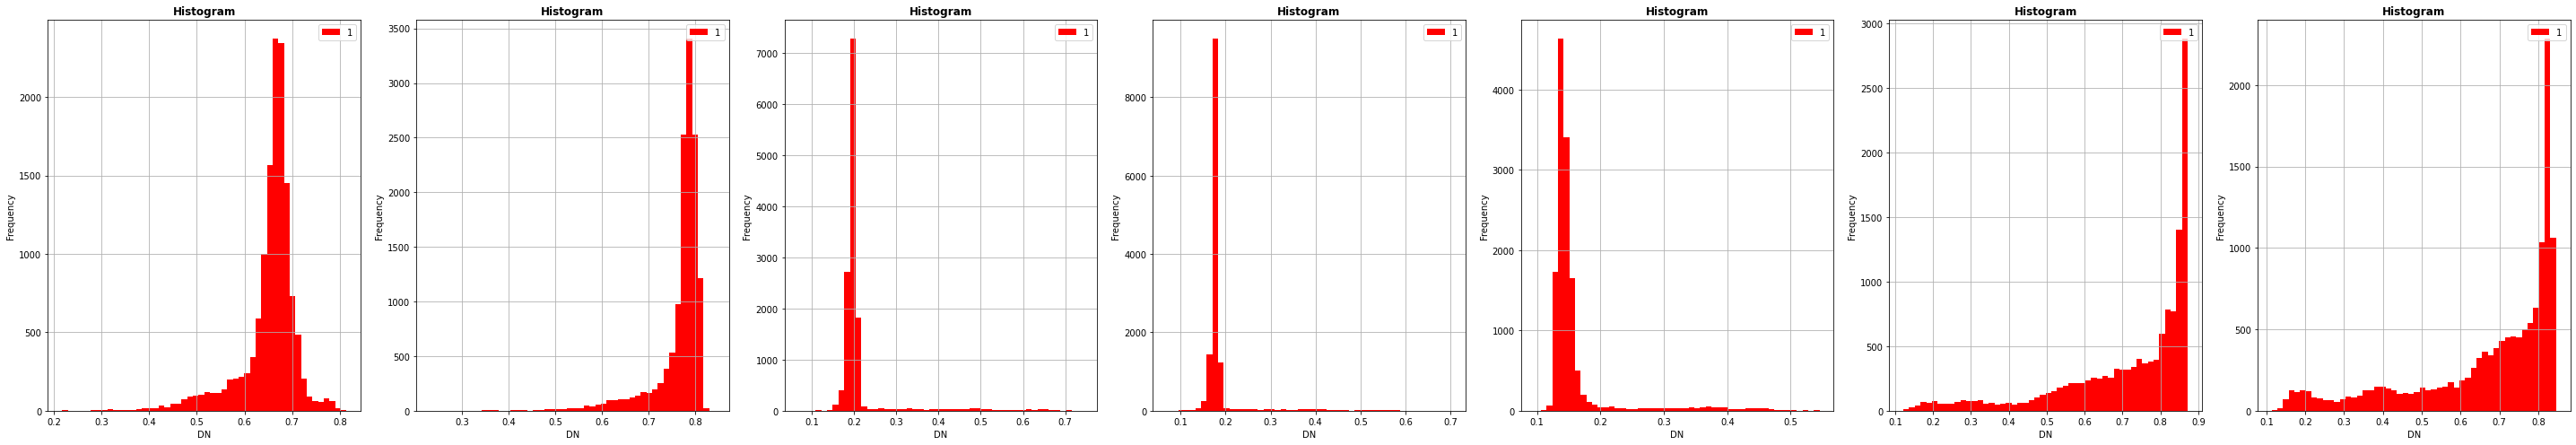

In [43]:

fig, axes = plt.subplots(1, len(ndvi_images), figsize=(40,7))
for ax, ndvi in zip(axes.flat, ndvi_images):
  show_hist(ndvi, ax=ax, bins=50, stacked=False, histtype='stepfilled', title="Histogram")

fig.tight_layout()

# Analise exploratória sobre RGB para entendimento se possuí áreas de subdesenvolvimento

In [44]:
rgb_images = []

for i in range(0, 7):
  rgb_images.append(rasterio.open(dataset_1 + df_1['RGB'][i]))

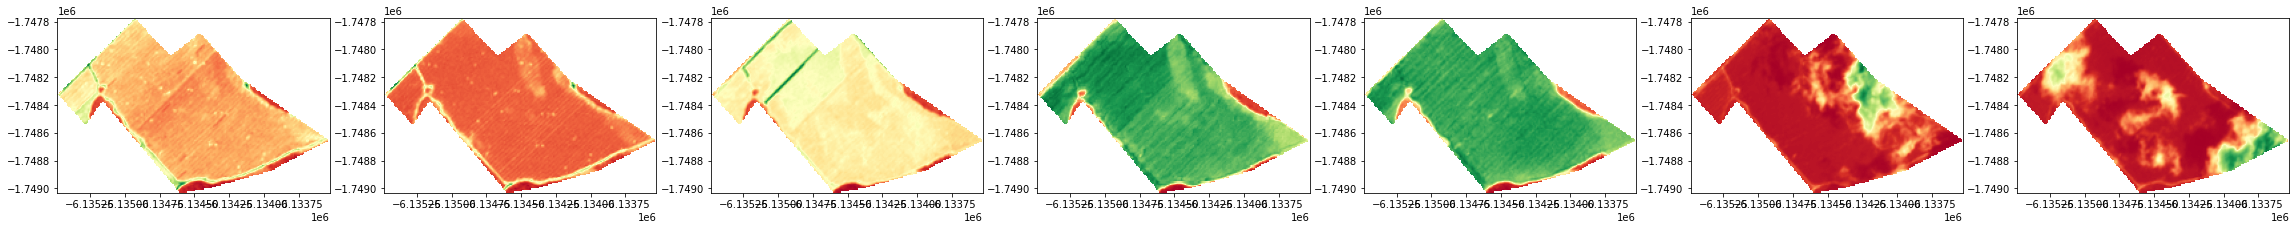

In [45]:

fig, axes = plt.subplots(1, len(rgb_images), figsize=(40,7))
for ax, rgb in zip(axes.flat, rgb_images):
    show(rgb, ax=ax, cmap='RdYlGn')

plt.show()

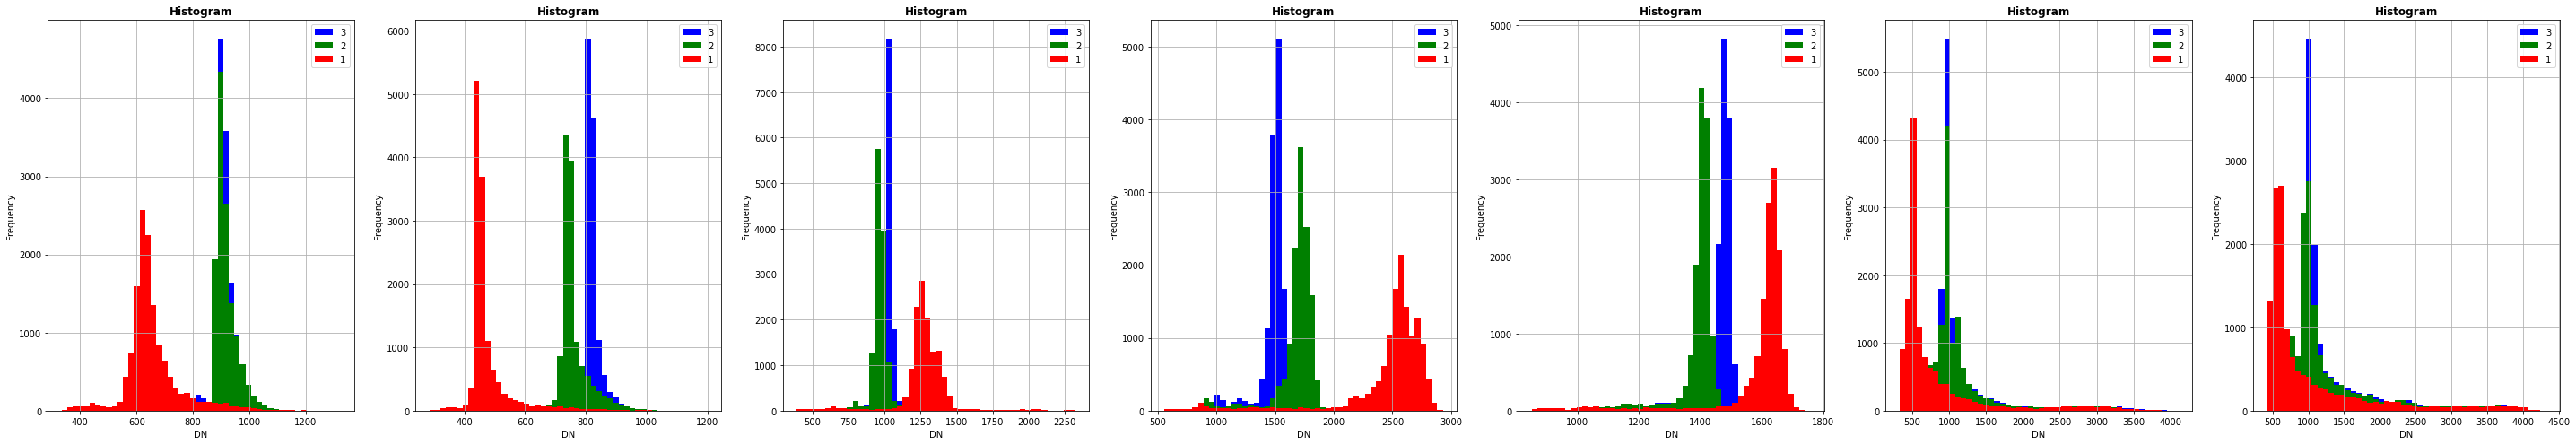

In [46]:

fig, axes = plt.subplots(1, len(rgb_images), figsize=(40,7))
for ax, rgb in zip(axes.flat, rgb_images):
  show_hist(rgb, ax=ax, bins=50, stacked=False, histtype='stepfilled', title="Histogram")

fig.tight_layout()

In [47]:
# estudos e testes

In [48]:
##ee.Authenticate()
##ee.Initialize()

In [49]:
##modis = ee.ImageCollection(rasters_df1)

##modis

Entendimento de como funcionam as Bandas de cada imagem

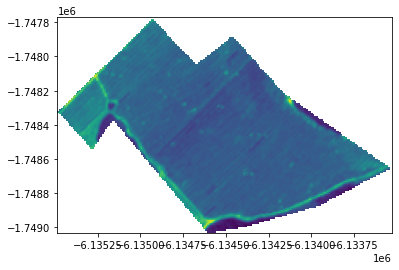

In [50]:
img_1_rgb = rasterio.open(dataset_1 + df_1['RGB'][0])
show(img_1_rgb)

In [51]:
img_band_1 = img_1_rgb.read(1)

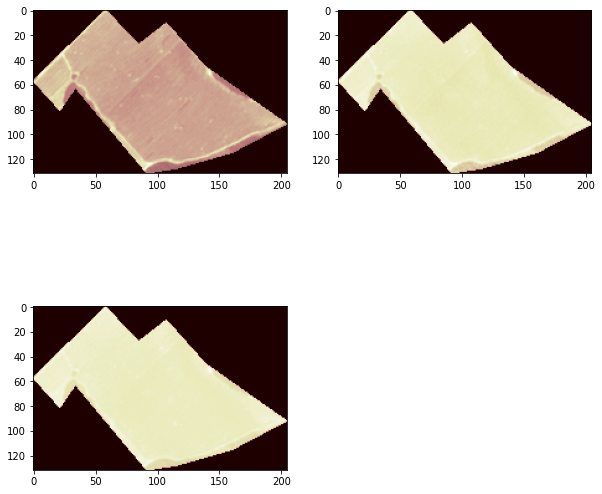

In [52]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img_band_1, cmap='pink')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_band_2, cmap='pink')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_band_3, cmap='pink')

In [99]:
 img_1_rgb.count

3

# Insumo para estudo (SEGMENTAÇÃO DE SUPERPIXELS)

Através da exploração das colorações dos NDVIS e seus histogramas, chegamos a um consenso de segmentar os setores das imagens e classifica-los de algumas forma

# Segmentação de imagens para construção de novo dataset

O objetivo da seção abaixo é criar segmentação entre as imagens e assim definir o que é cada setor e baseado no mesmo, vamos inserir uma informação no dataset com o percentual de produtividade baseado na cor.

Algumas tecnicas serão utilizadas através de alguns algoritmos como Slic que utiliza Kmeans e Quickshift que tambem se baseia em aproximação de kernel;


## QuickShift

Quickshift is a relatively recent 2D image segmentation algorithm, based on an approximation of kernelized mean-shift. Therefore it belongs to the family of local mode-seeking algorithms and is applied to the 5D space consisting of color information and image location 2.

One of the benefits of quickshift is that it actually computes a hierarchical segmentation on multiple scales simultaneously.

Quickshift has two main parameters: sigma controls the scale of the local density approximation, max_dist selects a level in the hierarchical segmentation that is produced. There is also a trade-off between distance in color-space and distance in image-space, given by ratio.

2 Quick shift and kernel methods for mode seeking, Vedaldi, A. and Soatto, S. European Conference on Computer Vision, 2008


## Slic

This algorithm simply performs K-means in the 5d space of color information and image location and is therefore closely related to quickshift. As the clustering method is simpler, it is very efficient. It is essential for this algorithm to work in Lab color space to obtain good results. The algorithm quickly gained momentum and is now widely used. See 3 for details. The compactness parameter trades off color-similarity and proximity, as in the case of Quickshift, while n_segments chooses the number of centers for kmeans.





Para as seguintes experimentações estamos utilizando a lib skimage ao invés de rasterio

In [178]:
from skimage.segmentation import quickshift, slic, morphological_geodesic_active_contour, inverse_gaussian_gradient
from skimage import io
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.filters import sobel
from skimage.color import rgb2gray
from cv2 import cv2
from skimage.measure import regionprops, regionprops_table, moments
from matplotlib.lines import Line2D


In [183]:
# Leitura RGB
img = io.imread(dataset_1 + df_1['RGB'][0])
img.shape

(132, 205, 3)

In [85]:
# Leitura NDVI
img_n = io.imread(dataset_1 + df_1['NDVI'][0])
img_n

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [65]:
# Para utilizar uma imagem NDVI no quickshift preciso criar 3 canais
img2 = np.zeros( ( np.array(img_n).shape[0], np.array(img_n).shape[1], 3 ) )
img2[:,:,0] = img_n
img2[:,:,1] = img_n
img2[:,:,2] = img_n

In [66]:
img2.shape

(132, 205, 3)

In [147]:
segments_quickshift = quickshift(img2)
print("Quickshift número de segmentos: %d" % len(np.unique(segments_quickshift)))

Quickshift número de segmentos: 20


In [148]:
segments_slic = slic(img2, n_segments=21, compactness=0.9, sigma=0.2,
                     start_label=1)
print("Slic número de segmentos: %d" % len(np.unique(segments_slic)))
print("Size: ", segments_slic.size)

Slic número de segmentos: 12
Size:  27060


In [149]:
gradient = sobel(rgb2gray(img2))
print("Gradient número de segmentos: %d" % len(np.unique(gradient)))

Gradient número de segmentos: 14143


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Gradient')

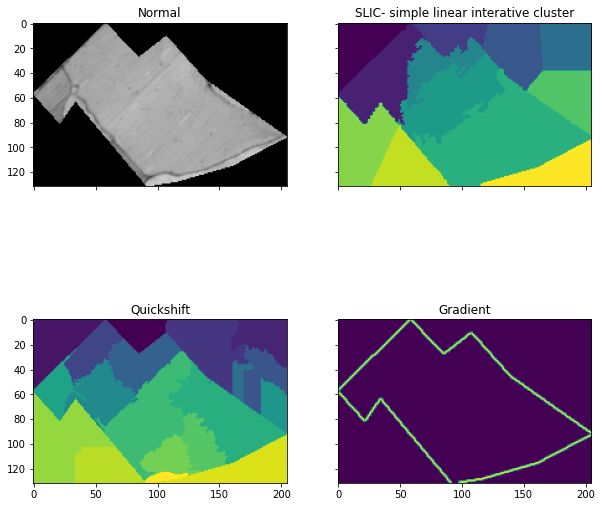

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow(img2)
ax[0, 0].set_title("Normal")
ax[0, 1].imshow(segments_slic)
ax[0, 1].set_title('SLIC- simple linear interative cluster')
ax[1, 0].imshow(segments_quickshift)
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(gradient)
ax[1, 1].set_title('Gradient')

Observando os resultados obtidos, vamos seguir com a segmentação quickshift.

obs:

NDVI deu um resultado de segmentação próximo ao RGB:

Até este momento utilizamos o site https://scikit-image.org/ para insumo dos estudos

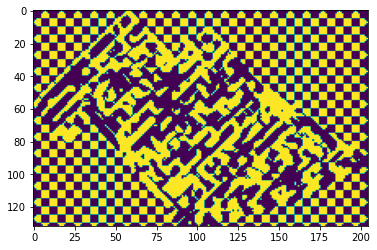

In [197]:
# Estudo de contornos
morph_test = morphological_geodesic_active_contour(img_n, 2, 'checkerboard')
plt.imshow(morph_test)

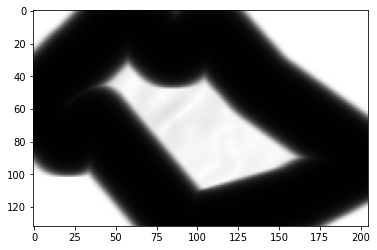

In [179]:
# Estudo de contornos
ig = inverse_gaussian_gradient(img2)
plt.imshow(ig)

In [162]:
# Acessando cada um dos segmentos
# https://scikit-image.org/docs/dev/api/skimage.measure.html

props = pd.DataFrame(regionprops_table(segments_quickshift, img2))
props

,label,bbox-0,bbox-1,bbox-2,bbox-3
0,1,0,0,57,58
1,2,0,159,39,205
2,3,0,107,61,174
3,4,0,24,53,73
4,5,21,170,77,205
5,6,11,60,63,121
6,7,33,161,67,178
7,8,50,142,52,143
8,9,32,25,90,85
9,10,47,184,92,205


In [203]:
# moments
props_df = pd.DataFrame(regionprops_table(segments_quickshift, img2, properties=['label', 'centroid', 'orientation', 'bbox', 'coords', 'solidity']))
props_df

,label,centroid-0,centroid-1,orientation,bbox-0,bbox-1,bbox-2,bbox-3,coords,solidity
0,1,18.586207,19.086207,-0.811262,0,0,57,58,"[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5...",0.991745
1,2,14.187663,185.729800,1.264091,0,159,39,205,"[[0, 166], [0, 167], [0, 168], [0, 169], [0, 1...",0.800974
2,3,21.736142,141.860754,0.841750,0,107,61,174,"[[0, 108], [0, 109], [0, 110], [0, 111], [0, 1...",0.868310
3,4,25.419833,47.623726,-0.742629,0,24,53,73,"[[0, 58], [1, 57], [1, 58], [1, 59], [2, 56], ...",0.872272
4,5,45.900000,184.056075,-0.232685,21,170,77,205,"[[21, 172], [22, 172], [22, 173], [23, 172], [...",0.706737
5,6,33.683246,86.839660,-1.197282,11,60,63,121,"[[11, 107], [12, 105], [12, 106], [12, 107], [...",0.794592
6,7,47.790850,166.300654,-0.135282,33,161,67,178,"[[33, 163], [34, 162], [34, 163], [34, 164], [...",0.709977
7,8,50.500000,142.000000,0.000000,50,142,52,143,"[[50, 142], [51, 142]]",1.000000
8,9,60.290510,54.771465,1.434937,32,25,90,85,"[[32, 57], [32, 58], [33, 57], [33, 58], [33, ...",0.728598
9,10,68.615385,194.096531,0.319421,47,184,92,205,"[[47, 184], [48, 184], [48, 185], [49, 184], [...",0.960870


In [164]:
# acessando pixel da 
img2[props_df.coords[0]]

array([[[[-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         ...,
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03]],

        [[-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         ...,
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03]]],


       [[[-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         [-9.99900000e+03, -9.99900000e+03, -9.99900000e+03],
         ...,
         [-9.99900000e

In [165]:
segments_ids = np.unique(segments_quickshift)
segments_ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [166]:
centers = np.array([np.mean(np.nonzero(segments_quickshift==i),axis=1) for i in segments_ids])


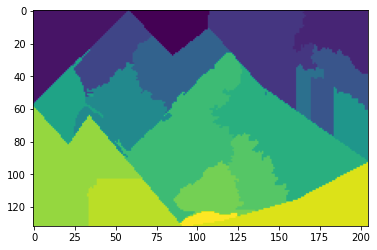

In [167]:
plt.imshow(segments_quickshift)

# Classificação de pixels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


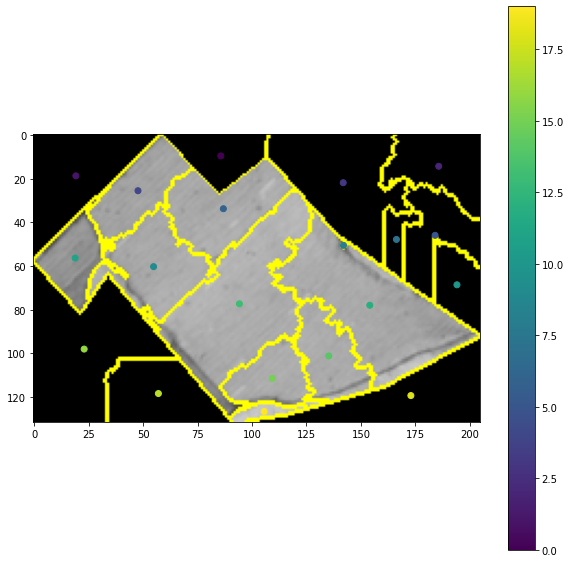

In [168]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(mark_boundaries(img2, segments_quickshift))
plt.scatter(centers[:,1],centers[:,0], c=segments_ids)

cb = plt.colorbar()


In [169]:
# Criação de variáveis para entender quem é o vizinho de quem

right = np.vstack([segments_quickshift[:,:-1].ravel(), segments_quickshift[:,1:].ravel()])
below = np.vstack([segments_quickshift[:-1,:].ravel(), segments_quickshift[1:,:].ravel()])
neighbors = np.unique(np.hstack([right, below]), axis=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


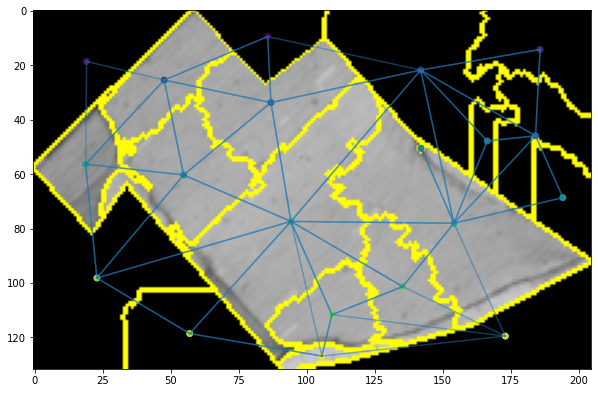

In [170]:
# Como são conectados os Pontos?

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(mark_boundaries(img2, segments_quickshift))
plt.scatter(centers[:,1],centers[:,0], c=segments_ids)


for i in range(neighbors.shape[1]):
    y0,x0 = centers[neighbors[0,i]]
    y1,x1 = centers[neighbors[1,i]]

    l = Line2D([x0,x1],[y0,y1], alpha=0.5)
    ax.add_line(l)

- ??? regressão linear para evoluçao para + produtivo ou - improdutivo
- criar loop para coordenadas X e Y [x, y] e investigar média de itensidade de pixels a partir de um contorno, e assim tentar entender o que é produtivo, improdutivo e nuvem (já tenho em nublado) - OPENCV

In [171]:
len(props_df.coords)

19

A detecção do contorno permite definir propriedades como
perímetro e forma do objeto em uma representação concisa,
mas não é de simples determinação, devido a grande variação
de condições de iluminação das imagens reais;




In [124]:
props_df['mean_boundaries'] = np.nan
for i in range(len(props_df.coords)):
  bounder = find_boundaries(segments_quickshift[i], mode='thick').astype(np.uint8)
  props_df['mean_boundaries'][i] = bounder.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [127]:
props_df.mean_boundaries.mean()

0.04415917843388961

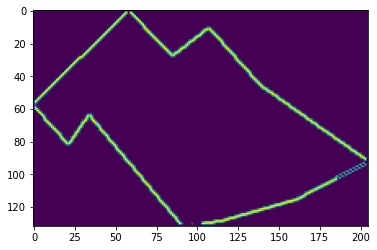

In [128]:
bounder = find_boundaries(segments_quickshift, mode='thick').astype(np.uint8)


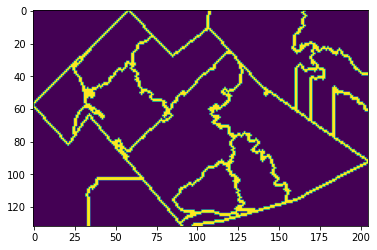

In [130]:
plt.imshow(bounder)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])